# Phone calls

## [Download worked project](../../_static/generated/phone-calls-prj.zip)

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/phone-calls)


![expected-prefixes-count-preview](expected-prefixes-count.png)

A radio station gathered calls from listeners, recording just the name of the caller and the phone number, as seen on the phone display. For marketing purposes, the station owner now wants to better understand the locations from where listeners where calling. He then hires you as Algorithmic Market Strategist and asks you to show statistics about the provinces of the calling sites. There is a problem, though. Numbers where written down by hand and sometimes they are not uniform, so it would be better to find a canonical representation.

**NOTE**: Phone prefixes can be a very tricky subject, if you are ever to deal with them seriously please use proper [phone number parsing libraries](https://github.com/daviddrysdale/python-phonenumbers) and do read [Falsehoods Programmers Believe About Phone Numbers](https://github.com/googlei18n/libphonenumber/blob/master/FALSEHOODS.md)


## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
phone-calls-prj
    phone-calls.ipynb
    phone-calls-sol.ipynb
    jupman.py 
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `phone-calls.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked.

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`

## 1. canonical

✪ We first want to canonicalize a phone number as a string. 

We suppose a canonical phone number:

- contains no spaces
- contains no international prefix, so no `+39` nor `0039`: we assume all calls where placed from Italy (even if they have international prefix)


For example, all of these are canonicalized to "0461123456":

```
+39 0461 123456
+390461123456
0039 0461 123456
00390461123456
```

These are canonicalized as the following:

```
328 123 4567        ->  3281234567
0039 328 123 4567   ->  3281234567
0039 3771 1234567   ->  37711234567
```


**REMEMBER: strings are immutable !!!!!**

In [1]:
def canonical(phone):
    """ RETURN the canonical version of phone as a string.
    """
    
    p = phone.replace(' ', '')
    if p.startswith('0039'):
        p = p[4:]
    if p.startswith('+39'):
        p = p[3:]
    return p
    

assert canonical('+39 0461 123456') == '0461123456'
assert canonical('+390461123456') == '0461123456'
assert canonical('0039 0461 123456') == '0461123456'
assert canonical('00390461123456') == '0461123456'
assert canonical('003902123456') == '02123456'
assert canonical('003902120039') == '02120039'
assert canonical('0039021239') == '021239'


In [1]:
def canonical(phone):
    """ RETURN the canonical version of phone as a string.
    """
    raise Exception('TODO IMPLEMENT ME !')

assert canonical('+39 0461 123456') == '0461123456'
assert canonical('+390461123456') == '0461123456'
assert canonical('0039 0461 123456') == '0461123456'
assert canonical('00390461123456') == '0461123456'
assert canonical('003902123456') == '02123456'
assert canonical('003902120039') == '02120039'
assert canonical('0039021239') == '021239'


## 2. prefix

✪✪ We now want to extract the province prefix - the ones we consider as valid are in `province_prefixes` list. Note some numbers are from mobile operators and you can distinguish them by prefixes like `328` - the ones we consider are in an `mobile_prefixes` list. Write a function that given a phone number RETURN the prefix of the phone as a string. 

- Remember first to make it canonical !!    
- If phone is mobile, RETURN string `'mobile'`. If it is not a phone nor a mobile, RETURN the string `'unrecognized'`
- To determine if the phone is mobile or from province, use provided `province_prefixes` and `mobile_prefixes` lists
- **USE the already defined function** `canonical(phone)`

In [2]:
province_prefixes = ['0461', '02', '011']
mobile_prefixes = ['330', '340', '328', '390', '3771']


def prefix(phone):
    
    c = canonical(phone)
    for m in mobile_prefixes:
        if c.startswith(m):
            return 'mobile'
    for p in province_prefixes:
        if c.startswith(p):
            return p
    return 'unrecognized'
    

assert prefix('0461123') == '0461'
assert prefix('+39 0461  4321') == '0461'
assert prefix('0039011 432434') == '011'
assert prefix('328 432434') == 'mobile'
assert prefix('+39340 432434') == 'mobile'
assert prefix('00666011 432434') == 'unrecognized'
assert prefix('12345') == 'unrecognized'
assert prefix('+39 123 12345') == 'unrecognized'


In [2]:
province_prefixes = ['0461', '02', '011']
mobile_prefixes = ['330', '340', '328', '390', '3771']


def prefix(phone):
    raise Exception('TODO IMPLEMENT ME !')

assert prefix('0461123') == '0461'
assert prefix('+39 0461  4321') == '0461'
assert prefix('0039011 432434') == '011'
assert prefix('328 432434') == 'mobile'
assert prefix('+39340 432434') == 'mobile'
assert prefix('00666011 432434') == 'unrecognized'
assert prefix('12345') == 'unrecognized'
assert prefix('+39 123 12345') == 'unrecognized'


## 3. hist

✪✪✪ Write a function that given a list of non-canonical phones, RETURN a dictionary where the keys are the prefixes of the canonical phones and the values are the frequencies of the prefixes (keys may also be `unrecognized` or `mobile`)

**NOTE** Numbers corresponding to the same phone (so which have the same canonicalrepresentation) must be counted ONLY ONCE!

**USE the already defined functions** `canonical(phone)` **AND** `prefix(phone)`

In [3]:
province_prefixes = ['0461', '02', '011']
mobile_prefixes = ['330', '340', '328', '390', '3771']


def hist(phones):
    
    d = {}
    s = set()
    
    for phone in phones:
        c = canonical(phone)
        if c not in s:
            s.add(c)
            p = prefix(phone)
            if p in d :
                d[p] += 1
            else:
                d[p] = 1
    return d
    

assert hist(['0461123']) == {'0461':1}
assert hist(['123']) == {'unrecognized':1}
assert hist(['328 123']) == {'mobile':1}
assert hist(['0461123','+390461123']) == {'0461':1}  # same canonicals, should be counted only once
assert hist(['0461123', '+39 0461  4321']) == {'0461':2}
assert hist(['0461123', '+39 0461  4321', '0039011 432434']) == {'0461':2, '011':1}
assert hist(['+39   02 423', '0461123', '02 426', '+39 0461  4321', '0039328 1234567', '02 423', '02 424']) == {'0461':2, 'mobile':1,  '02':3}

In [3]:
province_prefixes = ['0461', '02', '011']
mobile_prefixes = ['330', '340', '328', '390', '3771']


def hist(phones):
    raise Exception('TODO IMPLEMENT ME !')

assert hist(['0461123']) == {'0461':1}
assert hist(['123']) == {'unrecognized':1}
assert hist(['328 123']) == {'mobile':1}
assert hist(['0461123','+390461123']) == {'0461':1}  # same canonicals, should be counted only once
assert hist(['0461123', '+39 0461  4321']) == {'0461':2}
assert hist(['0461123', '+39 0461  4321', '0039011 432434']) == {'0461':2, '011':1}
assert hist(['+39   02 423', '0461123', '02 426', '+39 0461  4321', '0039328 1234567', '02 423', '02 424']) == {'0461':2, 'mobile':1,  '02':3}



## 4. display calls

✪✪ Using matplotlib, display a bar plot of the frequency of calls by prefixes (including mobile and unrecognized), sorting them in reverse order so you first see the province with the higher number of calls. 
Also, save the plot on disk with `plt.savefig('prefixes-count.png')` (call it before `plt.show()`)

If you're in trouble you can find plenty of examples in the [visualization chapter](https://en.softpython.org/visualization/visualization1-sol.html)

You should obtain something like this: 

![prefixes count solution 3984jj](expected-prefixes-count.png)

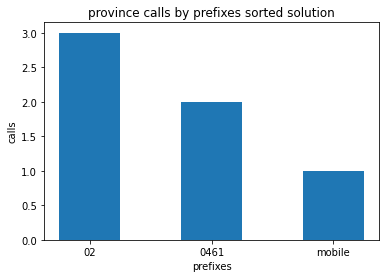

In [4]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
province_prefixes = ['0461', '02', '011']
mobile_prefixes = ['330', '340', '328', '390', '3771']
phones = ['+39   02 423', '0461123', '02 426', '+39 0461  4321', '0039328 1234567', '02 423', '02 424']

# write here

coords = list(hist(phones).items())

coords.sort(key=lambda x:x[1], reverse=True)

xs = np.arange(len(coords))
ys = [c[1] for c in coords]

plt.bar(xs, ys, 0.5, align='center')

plt.title("province calls by prefixes sorted solution")
plt.xticks(xs, [c[0] for c in coords])

plt.xlabel('prefixes')
plt.ylabel('calls')


plt.savefig(

            'prefixes-count.png')

plt.show()

In [4]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
province_prefixes = ['0461', '02', '011']
mobile_prefixes = ['330', '340', '328', '390', '3771']
phones = ['+39   02 423', '0461123', '02 426', '+39 0461  4321', '0039328 1234567', '02 423', '02 424']

# write here

